In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [3]:
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df1 = df.dropna()

In [6]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [7]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [8]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [10]:
 for column in cols:
    df1[column] = df1[column].astype(int)

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


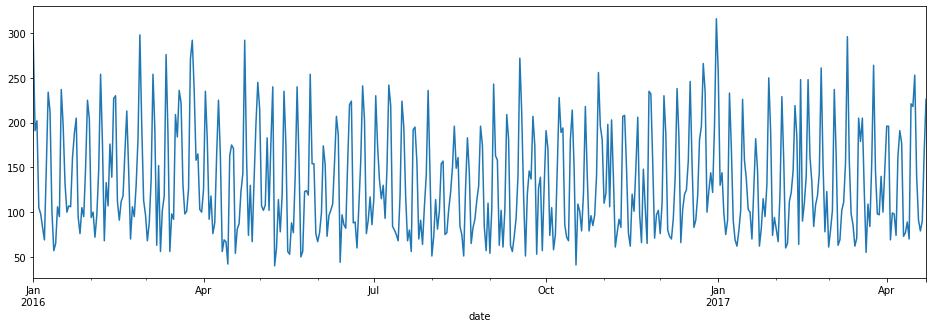

In [13]:
df1['total'].plot(figsize=(16,5))

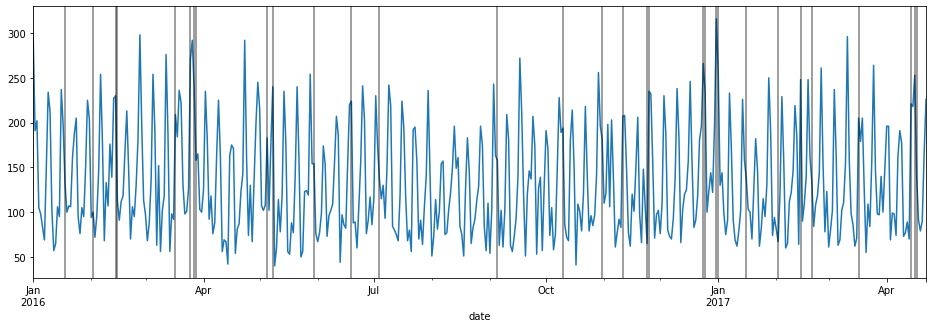

In [14]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.5);

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

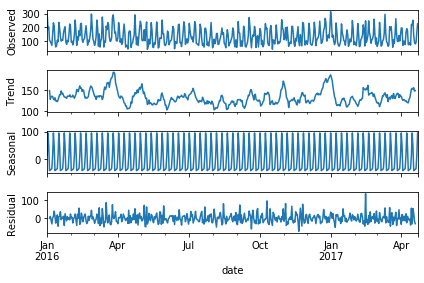

In [20]:
result = seasonal_decompose(df1['total'])
result.plot();

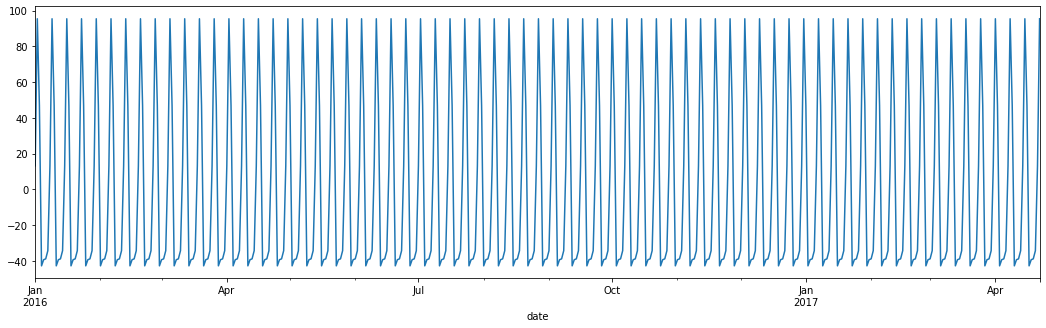

In [21]:
result.seasonal.plot(figsize=(18,5))

In [22]:
train = df1.iloc[:436]

In [23]:
test = df1.iloc[436:]

In [24]:
from pmdarima import auto_arima

In [25]:
auto_arima(df1['total'],seasonal=True,m=7).summary()

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/mod

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:                       y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1, 7)   Log Likelihood               -2382.792
Date:                 Tue, 11 Feb 2020   AIC                           4773.585
Time:                         06:22:07   BIC                           4790.263
Sample:                              0   HQIC                          4780.142
                                 - 478                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.6078      1.729      2.665      0.008       1.219       7.997
ar.S.L7        0.9648      0.013     77.093      0.000       0.940       0.989
ma.S.L7       -0.7134      0.052    -13.741      0.000      -0.815      -0.612
sigma2      1274.9763     78.549     16.232      0.000    1121.024    1428.929
===================================================================================
Ljung-Box (Q):                       68.31   Jarque-Bera (JB):                56.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.69
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)

In [28]:
results = model.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Tue, 11 Feb 2020   AIC                           4457.403
Time:                                   06:31:21   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
start = len(train)
end = len(train) + len(test)-1

In [32]:
predictions = results.predict(start,end).rename('SARIMA')

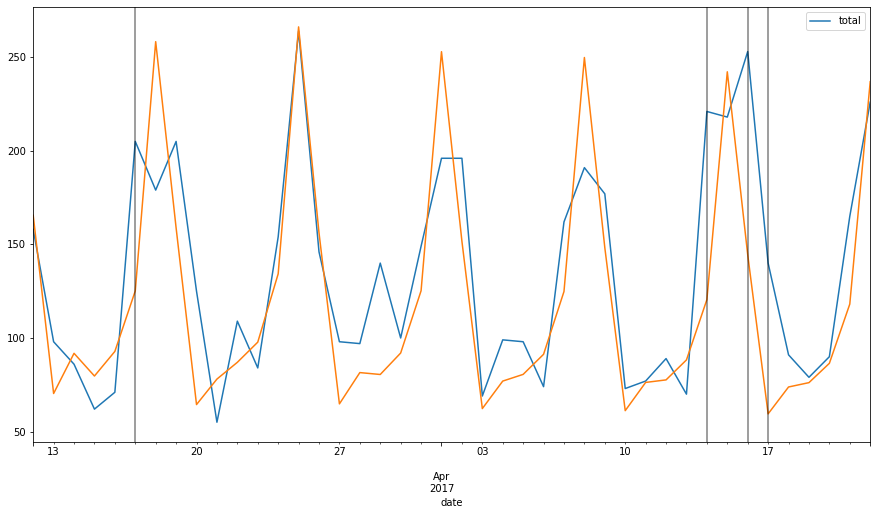

In [35]:
ax = test['total'].plot(legend=True,figsize=(15,8))
predictions.plot()

for day in df1.query('holiday==1').index:
    ax.axvline(x=day,color='black',alpha=0.5);

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(test['total'],predictions)

41.263154942417906

In [38]:
test['total'].mean()

134.26190476190476

In [39]:
auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7).summary()

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2352.759
Date:                           Tue, 11 Feb 2020   AIC                           4717.517
Time:                                   06:46:15   BIC                           4742.535
Sample:                               01-01-2016   HQIC                          4727.353
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.9670      3.058      5.549      0.000      10.974      22.960
holiday       47.8079      4.506     10.609      0.000      38.975      56.640
ar.L1          0.0355      0.048      0.737      0.461      -0.059       0.130
ar.S.L7        0.8679      0.023     37.739      0.000       0.823       0.913
ma.S.L7       -0.4735      0.061     -7.762      0.000      -0.593      -0.354
sigma2      1082.6858     76.592     14.136      0.000     932.568    1232.803
===================================================================================
Ljung-Box (Q):                      120.62   Jarque-Bera (JB):                 7.32
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.89   Skew:                             0.30
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [42]:
results = model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2089.208
Date:                           Tue, 11 Feb 2020   AIC                           4188.417
Time:                                   06:49:24   BIC                           4208.805
Sample:                               01-01-2016   HQIC                          4196.463
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9355      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3162     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (Q):                       36.17   Jarque-Bera (JB):                20.47
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
start = len(train)
end = len(train)+len(test)-1

In [47]:
predictions = results.predict(start,end,exog=test[['holiday']]).rename('SARIMAX')

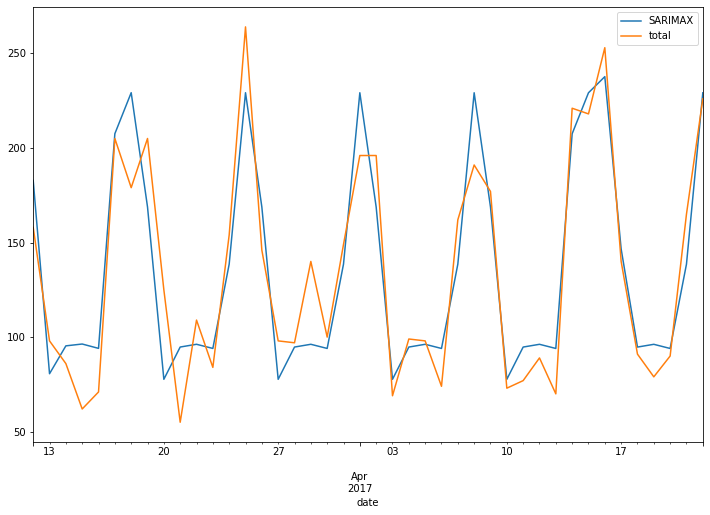

In [48]:
predictions.plot(figsize=(12,8),legend=True)
test['total'].plot(legend=True)

In [49]:
rmse(test['total'],predictions)

22.92975182654835

In [50]:
model = SARIMAX(df1['total'],exog=df1['holiday'],order=(1,0,1),seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [51]:
results = model.fit()

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [53]:
exof_forecast = df[478:][['holiday']]

In [54]:
fcast = results.predict(len(df1),len(df1)+38,exog=exof_forecast).rename('Final SARIMAX')

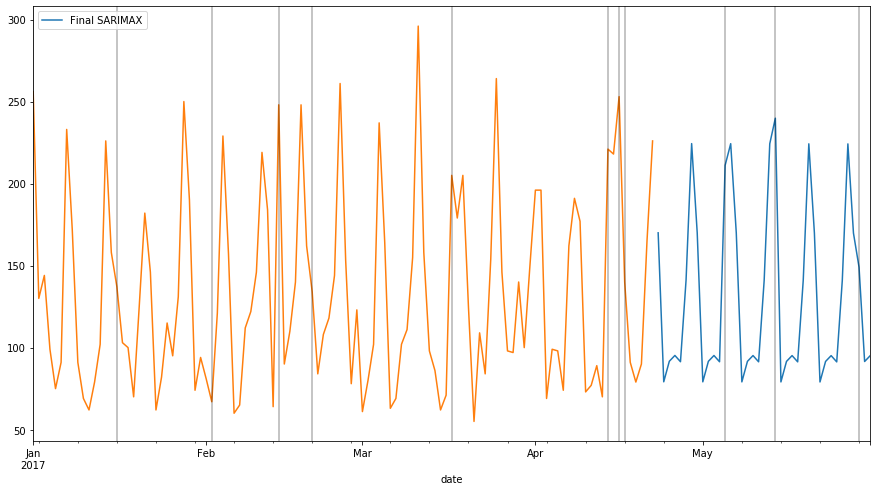

In [62]:
fcast.plot(figsize=(15,8),legend=True)
ax = df1['total'].loc['2017-01-01':].plot()

for x in df.query('holiday==1').index:
    ax.axvline(x=x,color='k',alpha=0.3)